# Описание задачи

*В Западной Сибири активно ведется разработка трудноизвлекаемых запасов. Такими запасами обладают отложения юрского периода. Однако не все отложения этого периода обладают достаточным количеством запасов углеводородов ввиду своих особеностей формирования. Поэтому было принято решение разделить отложения (в данном случае конкретно отложения Тюменской свиты) на пласты. **Разделение выглядит так: JK2-3, JK4, JK5-7.** Однако границы между этими пластами не обоснованы до конца (ни с точки зрения геофизики, ни с точки зрения условий формирования и литологии, так как они схожи). **Идея стостоит в том, чтобы с помощью однофакторного дисперсионного анализа посмотреть, есть ли статистически значимые различия между тремя пластами по значениям коэффициента пористости (так как это наиболее важный параметр в разработке (наряду с проницаемостью)), и есть ли основания разделять отложения Тюменской свиты на данные пласты по характеристике значения коэффициента пористости.** Для этого будем проводить однофакторный дисперсионный анализ сначала для пластов JK2-3 и JK4, далее для пластов JK4 и JK5-7.*

# Реализация

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import boxcox, shapiro, t, probplot, f

#Преобразуем данные в массив numpy
data = pd.read_csv(r'D:\math_project\math-kpor-jk2-3.csv', index_col=False)
JK2_3_k_por = data['JK2_3']
JK2_3= np.array(JK2_3_k_por)
JK4_k_por = data['JK4']
JK4 = np.array(JK4_k_por)
JK5_7_k_por = data['JK5_7']
JK5_7 = np.array(JK5_7_k_por)

*С помощью теста Шапиро-Уилка убедимся, являются ли данные нормально распределенными*

In [2]:
def shapiro_test(data, label, alpha=0.05):
    statistic, p_value = shapiro(data)
    print(f"Статистика теста Шапиро-Уилка для {label}: {statistic}")
    print(f"P-значение Шапиро-Уилка для {label}: {p_value}")
    
    if p_value < alpha:
        print(f"Отвергаем нулевую гипотезу: данные для {label} не подчиняются нормальному распределению.")
    else:
        print(f"Принимаем нулевую гипотезу: данные для {label} распределены нормально.")
    print("-" * 50)

# Применяем тест для каждого пласта
shapiro_test(JK2_3, 'JK2_3')
shapiro_test(JK4, 'JK4')
shapiro_test(JK5_7, 'JK5_7')

Статистика теста Шапиро-Уилка для JK2_3: 0.9473459366389869
P-значение Шапиро-Уилка для JK2_3: 0.08627511986202568
Принимаем нулевую гипотезу: данные для JK2_3 распределены нормально.
--------------------------------------------------
Статистика теста Шапиро-Уилка для JK4: 0.9357139638139911
P-значение Шапиро-Уилка для JK4: 0.0374216640918047
Отвергаем нулевую гипотезу: данные для JK4 не подчиняются нормальному распределению.
--------------------------------------------------
Статистика теста Шапиро-Уилка для JK5_7: 0.9076471470828884
P-значение Шапиро-Уилка для JK5_7: 0.005559275677759283
Отвергаем нулевую гипотезу: данные для JK5_7 не подчиняются нормальному распределению.
--------------------------------------------------


*После проведения теста Шапиро-Уилка оказалось, что данные для занчений коэффициента пористости для пластов JK4 и JK5-7 не рапределены нормально*

*Используем преобразование Box-Cox:*

In [3]:
JK4_transformed, lambda_JK4 = boxcox(JK4 + abs(min(JK4)) + 1)
JK5_7_transformed, lambda_JK5_7 = boxcox(JK5_7 + abs(min(JK5_7)) + 1)

print("Lambda для JK4:", lambda_JK4)
print("Lambda для JK5-7:", lambda_JK5_7)

Lambda для JK4: 3.459602409695188
Lambda для JK5-7: 2.9570347641507597


*Построим QQ-Plot  для того, чтобы убедиться что данные теперь распределены нормально:*

P-value для преобразованных данных: ShapiroResult(statistic=np.float64(0.9850383149992531), pvalue=np.float64(0.8974204534481082))


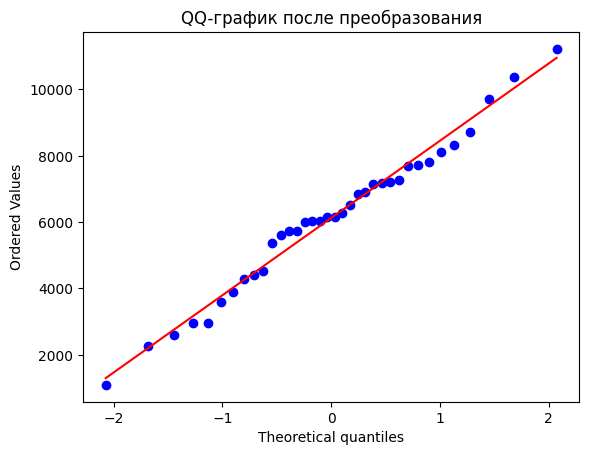

In [4]:
from scipy.stats import shapiro, probplot
import matplotlib.pyplot as plt

# Тест Шапиро-Уилка
p_value = shapiro(JK4_transformed)
print("P-value для преобразованных данных:", p_value)

# QQ-график
probplot(JK4_transformed, dist="norm", plot=plt)
plt.title("QQ-график после преобразования")
plt.show()

P-value для преобразованных данных: ShapiroResult(statistic=np.float64(0.973678521224715), pvalue=np.float64(0.5341793110607344))


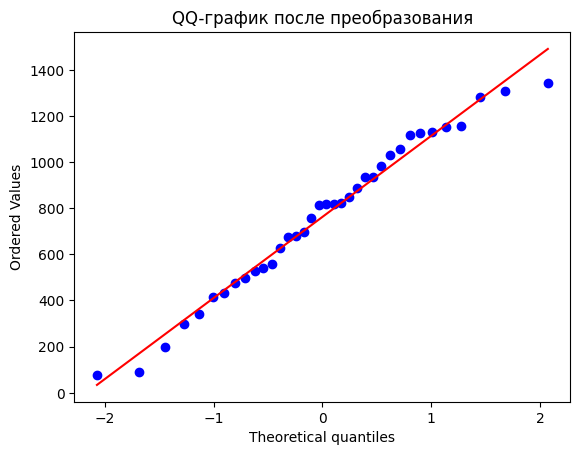

In [5]:
from scipy.stats import shapiro, probplot
import matplotlib.pyplot as plt

# Тест Шапиро-Уилка
p_value = shapiro(JK5_7_transformed)
print("P-value для преобразованных данных:", p_value)

# QQ-график
probplot(JK5_7_transformed, dist="norm", plot=plt)
plt.title("QQ-график после преобразования")
plt.show()

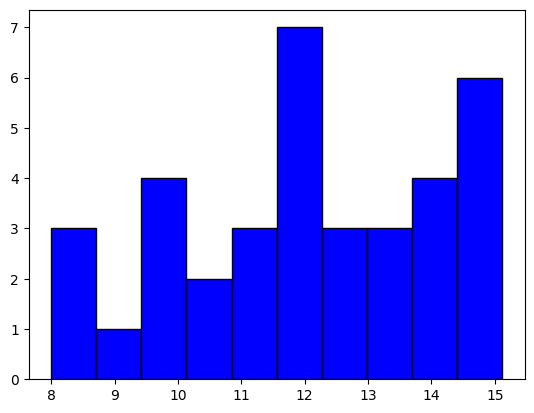

In [12]:
import matplotlib.pyplot as plt
plt.hist(JK2_3, color = 'blue', edgecolor = 'black')
plt.show()

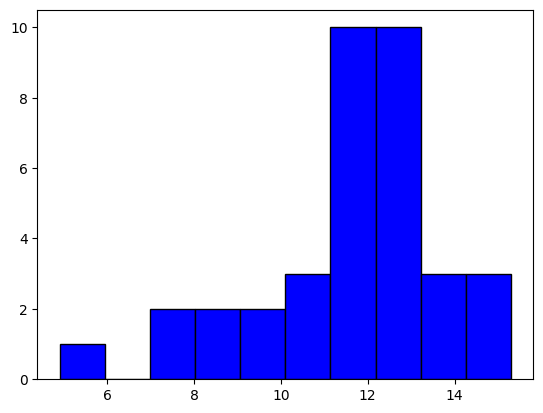

In [11]:
import matplotlib.pyplot as plt
plt.hist(JK4, color = 'blue', edgecolor = 'black')
plt.show()

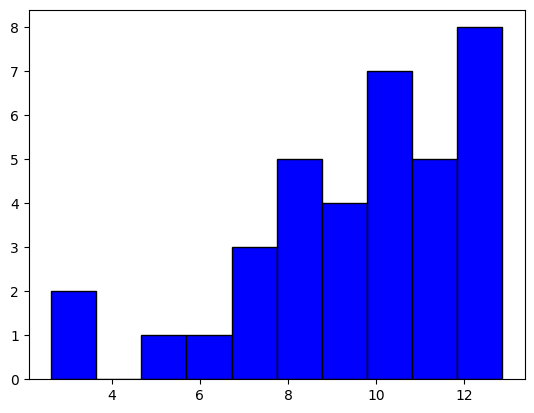

In [10]:
import matplotlib.pyplot as plt
plt.hist(JK5_7, color = 'blue', edgecolor = 'black')
plt.show()

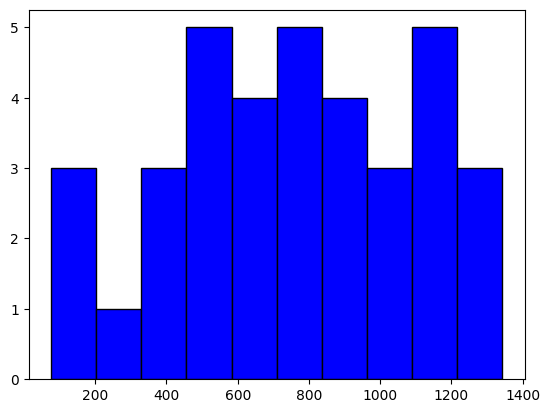

In [14]:
import matplotlib.pyplot as plt
plt.hist(JK5_7_transformed, color = 'blue', edgecolor = 'black')
plt.show()

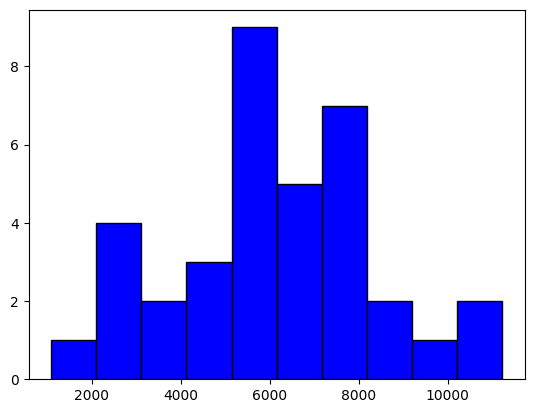

In [15]:
import matplotlib.pyplot as plt
plt.hist(JK4_transformed, color = 'blue', edgecolor = 'black')
plt.show()

*Проведем однофакторный диспресионный анализ для пластов JK2-3 и JK4*

In [7]:
horizon_JK2_3  = JK2_3 
horizon_JK4  = JK4_transformed

horizons = [horizon_JK2_3, horizon_JK4]

# Количество пластов
num_horizons = len(horizons)

# Количество данных значений коэффициента пористости для каждого из пластов
num_k_por_JK2_3 = len(horizon_JK2_3)
num_k_por_JK4= len(horizon_JK4)

# Общее количество данных значений коэффициента пористости
total_num_k_por = num_k_por_JK2_3 + num_k_por_JK4

# Общее среднее значение всех данных
overall_mean = (num_k_por_JK2_3 * np.mean(horizon_JK2_3) + num_k_por_JK4 * np.mean(horizon_JK4)) / total_num_k_por

# Считаем среднее значение для каждого пласта
mean_JK2_3 = np.mean(horizon_JK2_3)
mean_JK4 = np.mean(horizon_JK4)

# Общая сумма квадратов
SS_total = np.sum((horizon_JK2_3 - overall_mean) ** 2) + np.sum((horizon_JK4 - overall_mean) ** 2)

# Сумма квадратов между пластами
SS_between = num_k_por_JK2_3 * (mean_JK2_3 - overall_mean) ** 2 + num_k_por_JK4 * (mean_JK4 - overall_mean) ** 2

# Сумма квадратов внутри пластов
SS_within = SS_total - SS_between

# Расчет степеней свободы между и внутри пластов
df_between = num_horizons - 1 
df_within = total_num_k_por - num_horizons 

# Расчет средних квадратов между и внутри пластов
MS_between = SS_between / df_between
MS_within = SS_within / df_within 

#F-статистика
F_statistic = MS_between / MS_within 

p_value = 1 - f.cdf(F_statistic, df_between, df_within)

alpha = 0.05

if p_value < alpha:
    print("Есть статистически значимые различия в значениях коэффициента пористости между пластами (отвергаем H0)")
else:
    print("Статистически значимых различий в значениях коэффициента пористости между пластами нет (отвергаем H0)")


Есть статистически значимые различия в значениях коэффициента пористости между пластами (отвергаем H0)


*Проведем однофакторный диспресионный анализ для пластов JK4 и JK5-7*

In [8]:
horizon_JK4  = JK4_transformed
horizon_JK5_7  = JK5_7_transformed

horizons = [horizon_JK4, horizon_JK5_7]

# Количество пластов
num_horizons = len(horizons)

# Количество данных значений коэффициента пористости для каждого из пластов
num_k_por_JK4 = len(horizon_JK4)
num_k_por_JK5_7 = len(horizon_JK5_7)

# Общее количество данных значений коэффициента пористости
total_num_k_por = num_k_por_JK4 + num_k_por_JK5_7

# Общее среднее значение всех данных
overall_mean = (num_k_por_JK4 * np.mean(horizon_JK4) + num_k_por_JK5_7 * np.mean(horizon_JK5_7)) / total_num_k_por

# Считаем среднее значение для каждого пласта
mean_JK5_7 = np.mean(horizon_JK5_7)
mean_JK4 = np.mean(horizon_JK4)

# Общая сумма квадратов
SS_total = np.sum((horizon_JK4 - overall_mean) ** 2) + np.sum((horizon_JK5_7 - overall_mean) ** 2)

# Сумма квадратов между пластами
SS_between = num_k_por_JK4 * (mean_JK4 - overall_mean) ** 2 + num_k_por_JK5_7 * (mean_JK5_7 - overall_mean) ** 2

# Сумма квадратов внутри пластов
SS_within = SS_total - SS_between

# Расчет степеней свободы между и внутри пластов
df_between = num_horizons - 1 
df_within = total_num_k_por - num_horizons  

# Расчет средних квадратов между и внутри пластов
MS_between = SS_between / df_between
MS_within = SS_within / df_within 

#F-статистика
F_statistic = MS_between / MS_within 

p_value = 1 - f.cdf(F_statistic, df_between, df_within)

alpha = 0.05

if p_value < alpha:
    print("Есть статистически значимые различия в значениях коэффициента пористости между пластами (отвергаем H0)")
else:
    print("Статистически значимых различий в значениях коэффициента пористости между пластами нет (не отвергаем H0)")


Есть статистически значимые различия в значениях коэффициента пористости между пластами (отвергаем H0)


*В результате проведения однофакторного диспресионного анализа было выяснено, что **существуют статистические различия по значению коэффициента пористости между всеми тремя пластами: JK2-3, JK4, JK5-7.** С точки зрения геологии это можно объяснить так: доказано, что отложения Тюменской свиты образованы в континентальных условиях (реки, болота, озера). Абалакская свита, которая располагается над Тюменской свитой, сформировалась в мелководно-морских условиях, поэтому между отложениями Абалакской и Тюменской свиты должна быть переходная зона, представленная дельтовыми отложениями. К этой переходной зоне можно отнести пласт JK2-3, поэтому значения пористости от нижележащего пласта JK4(который сформировался в речной обстановке) могут отличаться. Различия в значениях коэффициента пористости для пластов JK4 и JK5-7 могут объясняться тем, что пласт JK5-7 представлен преимущественно аргиллитами и алевролитами, что говорит о постоянном заболачивании территории, в отличие от пласта JK4, в отложениях которого наблюдаются полноценные речные циклы.*